In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [3]:
df = pd.read_excel('../data/Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

#### - Negative Quantity

In [6]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [7]:
df.shape

(541909, 8)

In [8]:
df = df.loc[df['Quantity'] > 0]

In [9]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [10]:
pd.isnull(df['CustomerID']).sum()

133361

In [11]:
df.shape

(531285, 8)

In [12]:
df = df[pd.notnull(df['CustomerID'])]

In [13]:
df.shape

(397924, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [15]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [16]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [17]:
df.shape

(397924, 8)

In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [19]:
df.shape

(380620, 8)

#### - Total Sales

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Order Data

In [22]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [23]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

# 3. Data Analysis

In [24]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [25]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [26]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000   1.0   
18281.0        80.82     80.82     80.82     80.820000   1.0   
18282.0       100.21    100.21    100.21    100.210000   1.0   
18283.0         1.95    313.65   1886.88    125.792000  15.0   
18287.0        70.68   1001.32   1837.28    612.426667   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [27]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [28]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1.0,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [29]:
summary_df.shape

(4298, 9)

In [30]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [31]:
summary_df.shape

(2692, 9)

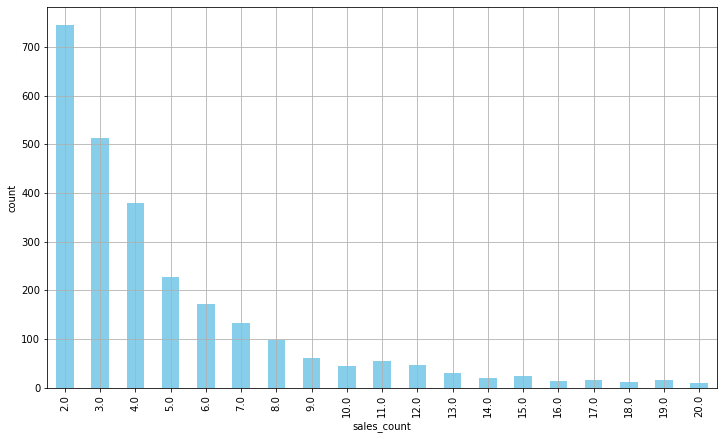

In [32]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [33]:
summary_df['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [34]:
summary_df['sales_avg'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_avg, dtype: float64

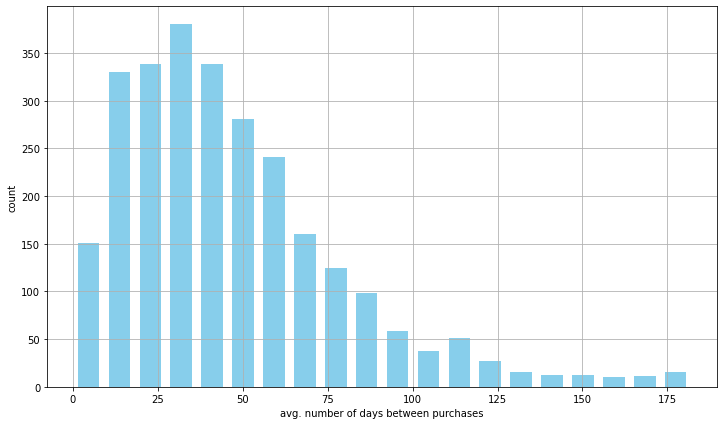

In [35]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [36]:
summary_df['invoicedate_purchase_frequency'].describe()

count    2692.000000
mean       46.999022
std        32.395004
min         0.029412
25%        23.500000
50%        40.500000
75%        62.333333
max       182.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [37]:
summary_df['invoicedate_purchase_duration'].describe()

count    2692.000000
mean      199.720282
std       107.816559
min         1.000000
25%       107.000000
50%       209.000000
75%       296.000000
max       364.000000
Name: invoicedate_purchase_duration, dtype: float64

# 4. Predicting 3-Month CLV

## 4.1. Data Preparation

In [38]:
clv_freq = '3M'

In [39]:
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

In [40]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [41]:
data_df = data_df.reset_index()

In [42]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0
5,12347.0,2011-12-31,1294.32,1294.320,1.0
6,12348.0,2010-12-31,892.80,892.800,1.0
7,12348.0,2011-03-31,227.44,227.440,1.0
8,12348.0,2011-06-30,367.00,367.000,1.0
9,12348.0,2011-09-30,310.00,310.000,1.0


In [43]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [44]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [45]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [46]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
6,12348.0,2010-12-31,892.80,892.800,1.0,M_5
7,12348.0,2011-03-31,227.44,227.440,1.0,M_4
8,12348.0,2011-06-30,367.00,367.000,1.0,M_3
9,12348.0,2011-09-30,310.00,310.000,1.0,M_2


#### - Building Sample Set

In [47]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

In [48]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [49]:
features_df.shape

(3616, 12)

In [63]:
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
12353.0,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00
12354.0,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00
12355.0,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00
12356.0,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,0.00,481.46,2271.62,0.00


In [64]:
features_df = features_df.fillna(0)

In [65]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [79]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
].set_index('CustomerID')

In [81]:
response_df.columns = ['CLV_'+clv_freq]

In [82]:
response_df.shape

(2407, 1)

In [83]:
response_df.head(10)

,CLV_3M
CustomerID,
12347.0,1294.32
12349.0,1757.55
12352.0,311.73
12356.0,58.35
12357.0,6207.67
12359.0,2876.85
12360.0,1043.78
12362.0,2119.85
12364.0,299.06


In [87]:
sample_set_df = features_df.join(
    response_df,
    how='left'
).reset_index()

In [88]:
sample_set_df.shape

(3616, 14)

In [89]:
sample_set_df.head(10)

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,NaN
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,NaN
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
5,12353.0,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00,NaN
6,12354.0,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00,NaN
7,12355.0,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00,NaN
8,12356.0,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,0.00,481.46,2271.62,0.00,58.35
9,12358.0,484.86,0.000,0.000,0.00,1.0,0.0,0.0,0.0,484.86,0.00,0.00,0.00,NaN


In [90]:
sample_set_df = sample_set_df.fillna(0)

In [91]:
sample_set_df.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [92]:
sample_set_df['CLV_'+clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

## 4.2. Regression Models

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

#### - Linear Regression Model

In [96]:
from sklearn.linear_model import LinearRegression

# Try these models as well
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [97]:
reg_fit = LinearRegression()

In [98]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [99]:
reg_fit.intercept_

99.06149405840472

In [100]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.527861
1,sales_avg_M_3,-0.378604
2,sales_avg_M_4,-0.268368
3,sales_avg_M_5,-1.149208
4,sales_count_M_2,57.091684
5,sales_count_M_3,-64.364091
6,sales_count_M_4,-84.492574
7,sales_count_M_5,94.536099
8,sales_sum_M_2,0.113007
9,sales_sum_M_3,0.446114


## 4.3. Evaluation

In [101]:
from sklearn.metrics import r2_score, median_absolute_error

In [102]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-Squared

In [103]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.6367
Out-of-Sample R-Squared: 0.8450


#### - Median Absolute Error

In [104]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 212.1651
Out-of-Sample MSE: 194.7207


#### - Scatter Plot

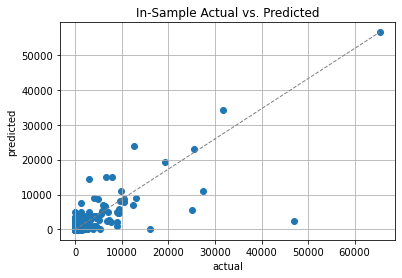

In [105]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

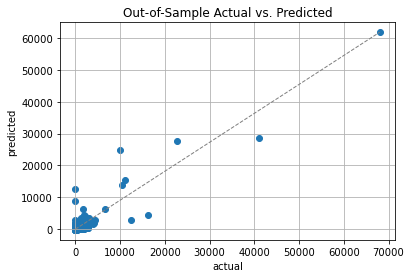

In [106]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()